# Empirical Distribution and Kernel Density Estimation
This notebook generates two samples from a *bimodal distribution*, estimates their empirical and kernel density functions (using a Gaussian and an Epanechnikov kernels), and compares different sampling methods.

## 1. Generating a Random Sample
We will first generate two bimodal datasets (`n1=100`, `n2=1,000,000`) to work with later. We will achieve this by combining a `Gamma(10, 3)` and a `Normal(0, 10)` distribution.

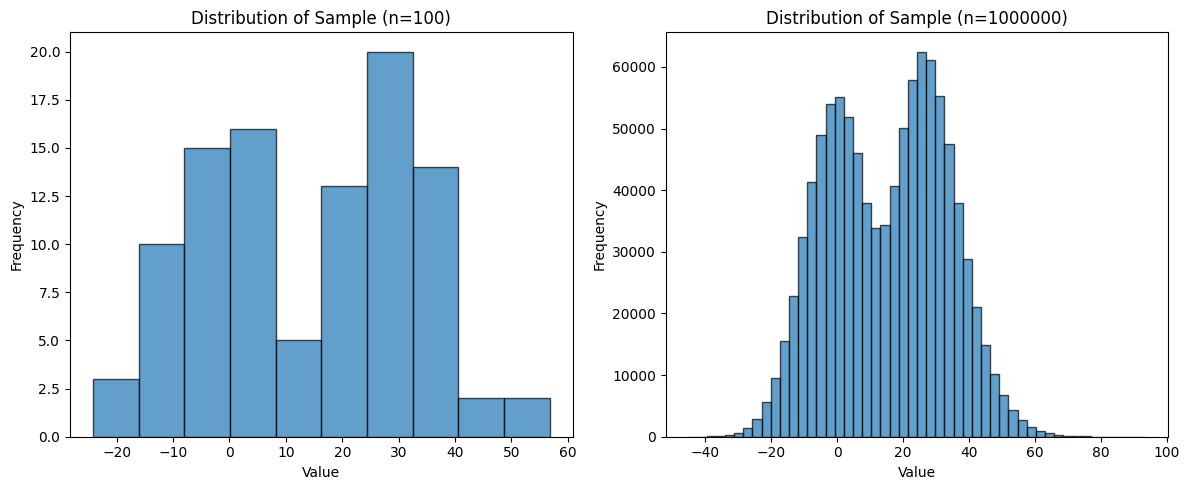

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two random samples
n1, n2 = 100, 1000000  # assumes n_i is divisible by 4
sample1 = np.concatenate([np.random.gamma(10, 3, n1//2), np.random.normal(loc=0, scale=10, size=n1//2)])  # Bimodal distribution
sample2 = np.concatenate([np.random.gamma(10, 3, n2//2), np.random.normal(loc=0, scale=10, size=n2//2)])  # Bimodal distribution

# Plot the first sample distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(sample1, bins=10, alpha=0.7, edgecolor='black')
plt.title(f'Distribution of Sample (n={n1})')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the second sample distribution
plt.subplot(1, 2, 2)
plt.hist(sample2, bins=50, alpha=0.7, edgecolor='black')
plt.title(f'Distribution of Sample (n={n2})')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Emprical Distribution Function 
Now, we can proceed with finding the empirical distribution function (CDF) and vizualizing it. With the smaller sample, the graph clearly shows that it is a piece-wise step function.  

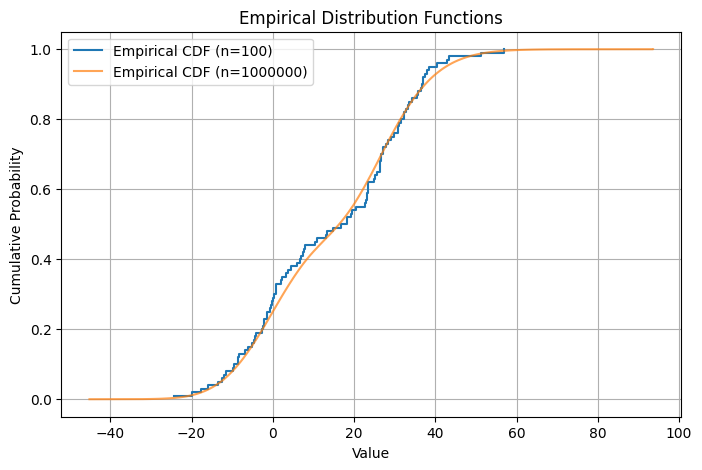

In [42]:
# Compute empirical distribution functions
def empirical_cdf(sample):
    sorted_sample = np.sort(sample)
    cdf_values = np.arange(1, len(sample) + 1) / len(sample)
    return sorted_sample, cdf_values

x1, y1 = empirical_cdf(sample1)
x2, y2 = empirical_cdf(sample2)

# Plot empirical CDFs
plt.figure(figsize=(8, 5))
plt.plot(x1, y1, label=f'Empirical CDF (n={n1})', drawstyle='steps-post')
plt.plot(x2, y2, label=f'Empirical CDF (n={n2})', drawstyle='steps-post', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Distribution Functions')
plt.legend()
plt.grid()
plt.show()

## 3. Kernel Density Estimation (with Gaussian and Epanechnikov Kernels)
- We will now use the built-in function for kernel density estimation with a Gaussian kernel `scipy.stats.gaussian_kde`
- Additionally, we will define a function, which uses an Epanechnikov kernel 
- For each of our original samples, we will vizualize the two Kernel Density estimations

<Figure size 1200x500 with 0 Axes>

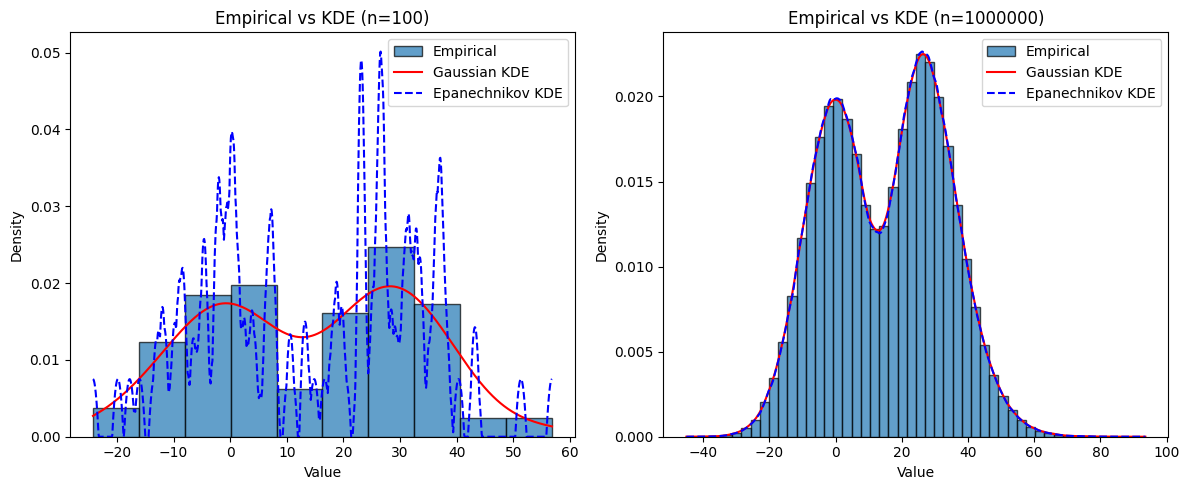

In [43]:
from scipy.stats import gaussian_kde

# Kernel density estimation
def kernel_density_estimate(sample):
    kde = gaussian_kde(sample)
    x_vals = np.linspace(min(sample), max(sample), 1000)
    y_vals = kde(x_vals)
    return x_vals, y_vals

# Epanechnikov kernel estimation
def epanechnikov_kernel(sample, bandwidth=1.0):
    x_vals = np.linspace(min(sample), max(sample), 1000)
    y_vals = np.zeros_like(x_vals)
    n = len(sample)
    for i, x in enumerate(x_vals):
        u = (x - sample) / bandwidth
        mask = np.abs(u) <= 1
        y_vals[i] = (3 / (4 * bandwidth * n)) * np.sum((1 - u[mask]**2))
    return x_vals, y_vals

x_kde1, y_kde1 = kernel_density_estimate(sample1)
x_kde2, y_kde2 = kernel_density_estimate(sample2)
x_epan1, y_epan1 = epanechnikov_kernel(sample1, bandwidth=1.0)
x_epan2, y_epan2 = epanechnikov_kernel(sample2, bandwidth=1.0)

# Plot empirical vs kernel density estimation for each sample
plt.figure(figsize=(12, 5))

# Plot empirical vs kernel density estimation for each sample
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1, bins=10, density=True, alpha=0.7, edgecolor='black', label='Empirical')
plt.plot(x_kde1, y_kde1, label='Gaussian KDE', color='red')
plt.plot(x_epan1, y_epan1, label='Epanechnikov KDE', color='blue', linestyle='dashed')
plt.title(f'Empirical vs KDE (n={n1})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sample2, bins=50, density=True, alpha=0.7, edgecolor='black', label='Empirical')
plt.plot(x_kde2, y_kde2, label='Gaussian KDE', color='red')
plt.plot(x_epan2, y_epan2, label='Epanechnikov KDE', color='blue', linestyle='dashed')
plt.title(f'Empirical vs KDE (n={n2})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Sampling
We will now generate a new sample, which is useful, e.g., if we want to make a simulation based on that. We will use two different techniques to do that:
- inverting the emprical distribution (this does not inovlve the KDE at all)
- using the built-in resampling function `scipy.stats.gaussian_kde.resample()`

Generated new samples from empirical and KDE distributions.


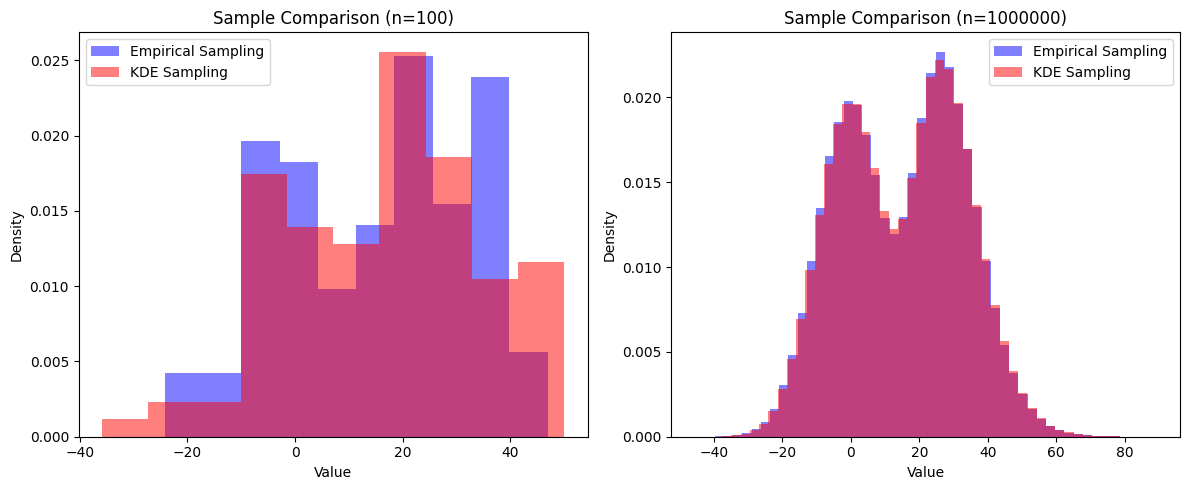

In [44]:
# Generate random samples based on empirical and KDE estimations

def inverse_transform_sampling(empirical_x, empirical_cdf, size):
    uniform_samples = np.random.uniform(0, 1, size)
    return np.interp(uniform_samples, empirical_cdf, empirical_x)

# Generate samples from empirical CDF
sample_empirical1 = inverse_transform_sampling(x1, y1, n1)
sample_empirical2 = inverse_transform_sampling(x2, y2, n2)

# Generate samples from KDE
sample_kde1 = gaussian_kde(sample1).resample(n1)[0]
sample_kde2 = gaussian_kde(sample2).resample(n2)[0]

print("Generated new samples from empirical and KDE distributions.")

# Plot superimposed histograms for empirical and KDE-based samples
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample_empirical1, bins=10, density=True, alpha=0.5, color='blue', label='Empirical Sampling')
plt.hist(sample_kde1, bins=10, density=True, alpha=0.5, color='red', label='KDE Sampling')
plt.title(f'Sample Comparison (n={n1})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sample_empirical2, bins=50, density=True, alpha=0.5, color='blue', label='Empirical Sampling')
plt.hist(sample_kde2, bins=50, density=True, alpha=0.5, color='red', label='KDE Sampling')
plt.title(f'Sample Comparison (n={n2})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()